In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import plotly.graph_objects as go
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 폰트 이름 확인
from matplotlib import font_manager
f_path = 'c:/Windows/Fonts/malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Malgun Gothic'

In [4]:
# 한국어 설정
from matplotlib import font_manager, rc
rc("font",family ='Malgun Gothic')
%matplotlib inline

In [6]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_3.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          652 non-null    object 
 7   age_miss            864 non-null    object 
 8   justwatch_us_age    908 non-null    object 
 9   production_country  908 non-null    object 
 10  total_count         908 non-null    int64  
 11  total_rate          908 non-null    float64
 12  watchlist           908 non-null    int64  
 13  popularity          908 non-null    int64  
 14  user_review         908 non-null    int64  
 15  critic_review       908 non-null    int64  
 16  production   

In [7]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [8]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [9]:
# 시청 지속율 계산 함수
def calculate_retention_rate(season_data):
    episode_views = [ep[1] for ep in season_data.values() if isinstance(ep, (list, tuple))]
    if len(episode_views) > 1:
        initial_viewers = episode_views[0]
        final_viewers = episode_views[-1]
        retention_rate = (final_viewers / initial_viewers) * 100
    else:
        retention_rate = 100  # If there's only one episode, retention is 100%
    return retention_rate

# 시즌 1의 시청 지속율 계산
df['s1_retention_rate'] = df['season_1'].apply(calculate_retention_rate)

In [10]:
del df['season_3']
del df['season_4']
del df['season_5']
del df['season_6']
del df['season_7']
del df['season_8']
del df['season_9']
del df['season_10']
del df['season_11']
del df['season_12']
del df['season_13']
del df['season_14']
del df['season_15']
del df['season_16']
del df['season_17']


In [11]:
del df['imdb_title']
del df['imdb_url']

In [12]:
del df['age_miss']
del df['justwatch_us_age']

In [13]:
df_1 = df[df['total_season_num']==1]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               631 non-null    object 
 1   english_title       631 non-null    object 
 2   year                631 non-null    int64  
 3   total_season_num    631 non-null    int64  
 4   runtime             631 non-null    int64  
 5   genre               631 non-null    object 
 6   age_rating          445 non-null    object 
 7   production_country  631 non-null    object 
 8   total_count         631 non-null    int64  
 9   total_rate          631 non-null    float64
 10  watchlist           631 non-null    int64  
 11  popularity          631 non-null    int64  
 12  user_review         631 non-null    int64  
 13  critic_review       631 non-null    int64  
 14  production          559 non-null    object 
 15  distributor         625 non-null    object 
 16  season_1     

In [14]:
df_2 = df[df['total_season_num']>=2]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 1 to 887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               277 non-null    object 
 1   english_title       277 non-null    object 
 2   year                277 non-null    int64  
 3   total_season_num    277 non-null    int64  
 4   runtime             277 non-null    int64  
 5   genre               277 non-null    object 
 6   age_rating          207 non-null    object 
 7   production_country  277 non-null    object 
 8   total_count         277 non-null    int64  
 9   total_rate          277 non-null    float64
 10  watchlist           277 non-null    int64  
 11  popularity          277 non-null    int64  
 12  user_review         277 non-null    int64  
 13  critic_review       277 non-null    int64  
 14  production          265 non-null    object 
 15  distributor         275 non-null    object 
 16  season_1     

# 시청 지속력

In [15]:
# Box Plot 시각화
fig = go.Figure()

# df_1 Box Plot
fig.add_trace(go.Box(
    y=df_1['s1_retention_rate'],
    name='Season 1 Only',
    boxpoints='all',  # 'outliers', 'suspectedoutliers', or False
    jitter=0.3,       # Spread the points horizontally
    pointpos=-1.8     # Offset points to the left of the box
))

# df_2 Box Plot
fig.add_trace(go.Box(
    y=df_2['s1_retention_rate'],
    name='Season 2+',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# df Box Plot (Combined DataFrame)
fig.add_trace(go.Box(
    y=df['s1_retention_rate'],
    name='Combined',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Retention Rate Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Retention Rate (%)',
    showlegend=False
)

# 그래프 보여주기
fig.show()

In [16]:
top_10_retention_rates = df_2.sort_values(by='s1_retention_rate', ascending=False).head(10)
print(top_10_retention_rates[['title','s1_retention_rate']])

             title  s1_retention_rate
index                                
59          길모어 걸스         564.102564
223          진실의 늪         214.893617
9        The Flash         135.416667
670         시크릿 위치         127.272727
25          굿 플레이스         126.666667
370    굿 키즈 온 더 블록         116.743119
352     루머의 루머의 루머         112.658228
54             덱스터         109.090909
180    원 데이 앳 어 타임         106.085526
46           블랙 미러         103.174603


- Season 2+ 이상치는 https://www.imdb.com/title/tt0238784/episodes/?ref_=tt_eps_sm

In [17]:
# total
sum(df['s1_retention_rate'])/len(df['s1_retention_rate'])

74.42340461206258

In [18]:
# season 1 only
sum(df_1['s1_retention_rate'])/len(df_1['s1_retention_rate'])

73.60638531408867

In [19]:
# season 2+
sum(df_2['s1_retention_rate'])/len(df_2['s1_retention_rate'])

76.2845568756785

- 어떤 그래프로?

## age_rating

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\3669168911.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



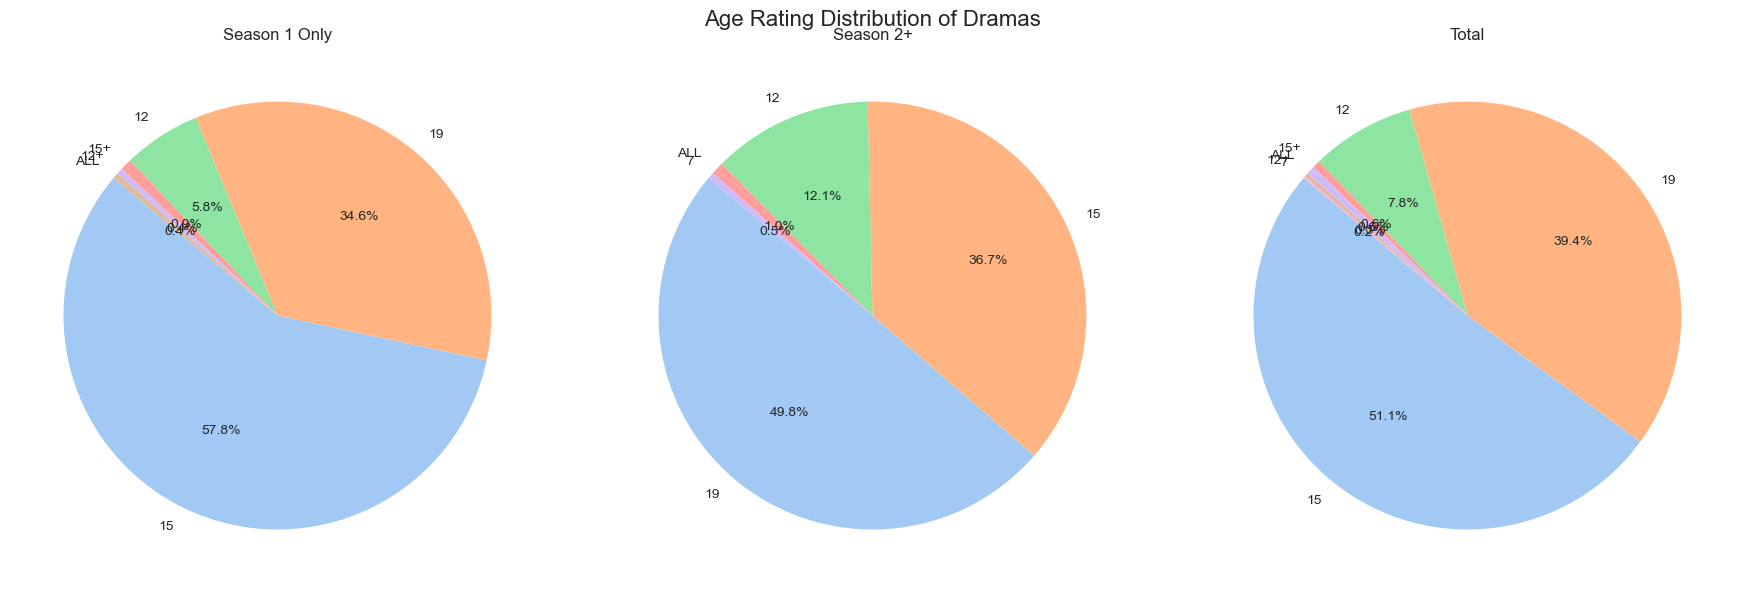

In [20]:
# 각 데이터프레임에서 age_rating 값 별 드라마 수 계산
df_1_counts = df_1['age_rating'].value_counts()
df_2_counts = df_2['age_rating'].value_counts()
df_counts = df['age_rating'].value_counts()

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# subplot 1
axes[0].pie(df_1_counts, labels=df_1_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0].set_title('Season 1 Only')

# subplot 2
axes[1].pie(df_2_counts, labels=df_2_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Season 2+')

# subplot 3
axes[2].pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[2].set_title('Total')

# 전체 그래프의 제목 설정
fig.suptitle('Age Rating Distribution of Dramas', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


- 'Season 2+'이 'Season 1 Only'보다 19세 비중이 더많은것으로 확인됨

## runtime

In [21]:
# runtime Box Plot 시각화
fig = go.Figure()

# runtime Box Plot
fig.add_trace(go.Box(
    y=df_1['runtime'],
    name='S1 Only - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df_2['runtime'],
    name='S2+ - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['runtime'],
    name='Total - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Runtime Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Runtime (minutes)',
    showlegend=True
)

# runtime 그래프 보여주기
fig.show()

- 시즌2개 이상인 드라마가 runtime이 적음

## year(개봉연도)

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\2920286143.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



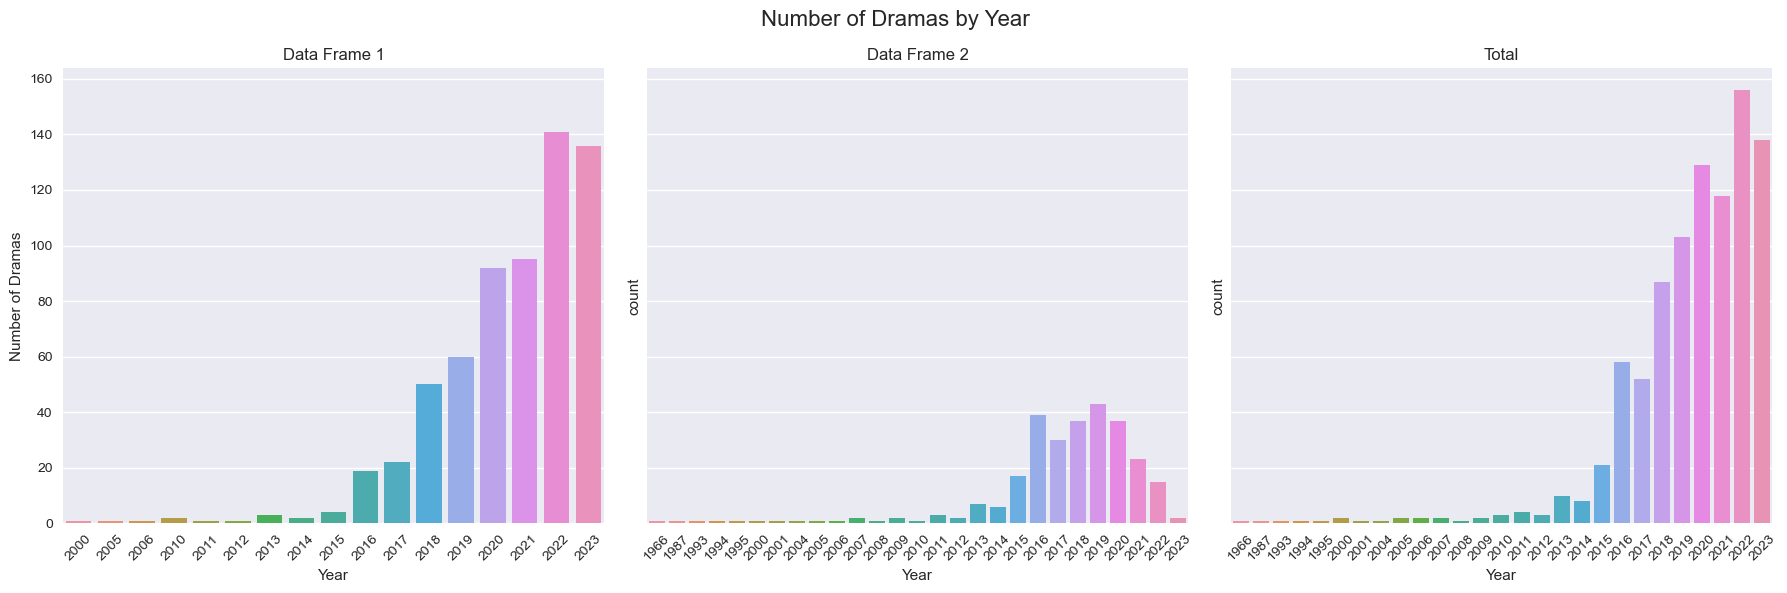

In [22]:
# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# subplot 1: df_1
plt.subplot(1, 3, 1)
sns.countplot(data=df_1, x='year', ax=axes[0])
axes[0].set_title('Data Frame 1')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Dramas')
axes[0].tick_params(axis='x', rotation=45)

# subplot 2: df_2
plt.subplot(1, 3, 2)
sns.countplot(data=df_2, x='year', ax=axes[1])
axes[1].set_title('Data Frame 2')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=45)

# subplot 3: df
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='year', ax=axes[2])
axes[2].set_title('Total')
axes[2].set_xlabel('Year')
axes[2].tick_params(axis='x', rotation=45)

# 전체 그래프의 제목 설정
fig.suptitle('Number of Dramas by Year', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

- 시즌2이상 만드는게 주춤해진듯?(실선그래프가 더 나으려나?)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          652 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1

- production_country EDA가 의미가 있을까 의문
- 넷플릭스 한국방영 기준이니 한국드라마가 많기에

## genre

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:27: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:48: UserWarning:

Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:48: UserWarning:

Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:48: UserWarning:

Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:48: UserWarning:

Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_17212\593945958.py:48: Us

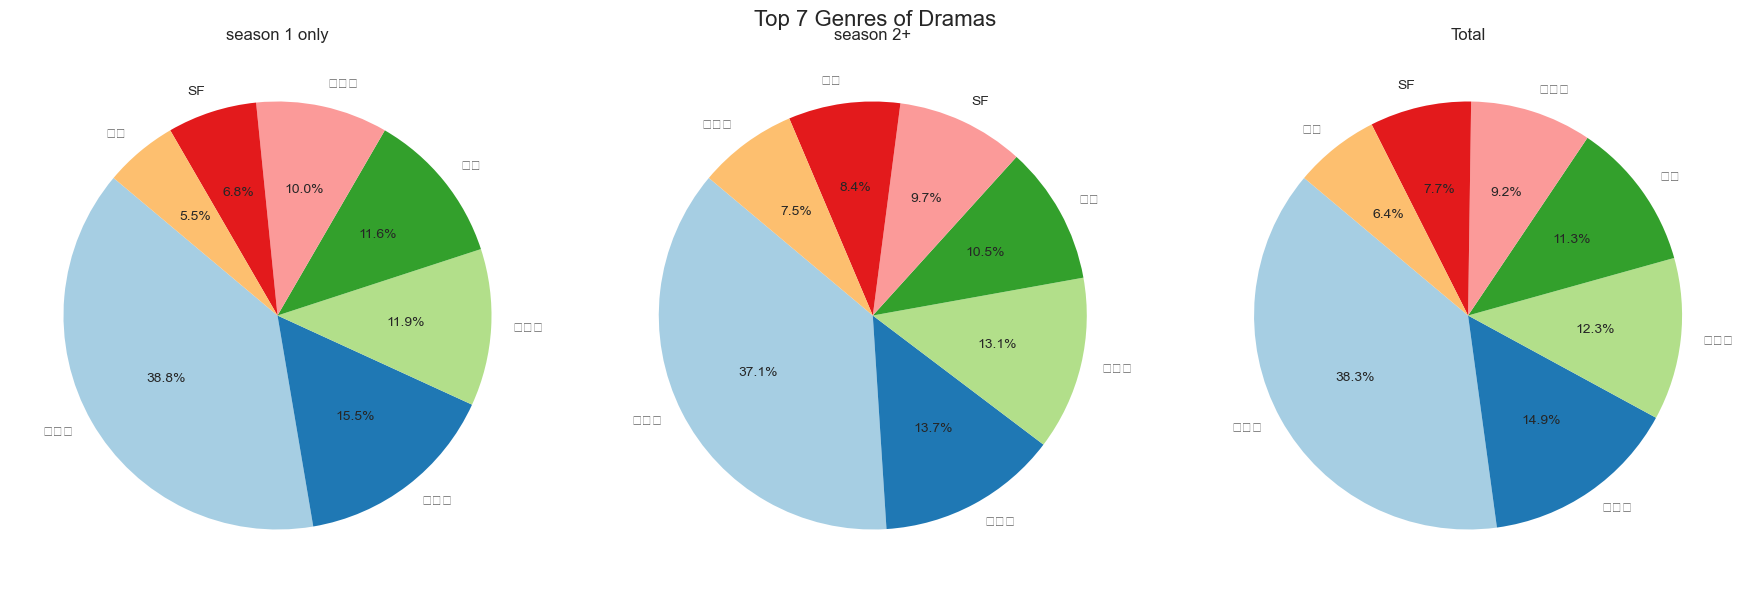

In [24]:
from collections import Counter
# 함수 정의
def get_top_genres(df, genre_column):
    genre_list = []
    for idx, row in df.iterrows():
        tmp_list = row[genre_column].split(', ')
        for x in tmp_list:
            genre_list.append(x.strip())  # 장르 문자열 앞뒤 공백 제거
    
    # 상위 7개 장르 선택
    counts = Counter(genre_list)
    top_genres = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:7]
    
    return top_genres

# 각 데이터프레임에서 상위 7개 장르 선택
top_genres_df = get_top_genres(df, 'genre')
top_genres_df_1 = get_top_genres(df_1, 'genre')
top_genres_df_2 = get_top_genres(df_2, 'genre')

# 상위 장르 데이터 추출
genres_df, cnt_df = zip(*top_genres_df)
genres_df_1, cnt_df_1 = zip(*top_genres_df_1)
genres_df_2, cnt_df_2 = zip(*top_genres_df_2)

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# subplot 1: df_1
axes[0].pie(cnt_df_1, labels=genres_df_1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df_1))))
axes[0].set_title('season 1 only')

# subplot 2: df_2
axes[1].pie(cnt_df_2, labels=genres_df_2, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df_2))))
axes[1].set_title('season 2+')

# subplot 3: df
axes[2].pie(cnt_df, labels=genres_df, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df))))
axes[2].set_title('Total')

# 전체 그래프의 제목 설정
plt.suptitle('Top 7 Genres of Dramas', fontsize=16)

# 그래프 출력
plt.tight_layout()
plt.show()

In [27]:
# 장르
genre = []
for idx, row in df.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 354
코미디: 291
범죄: 267
로맨스: 218
SF: 182
액션: 153
판타지: 127
공포: 75
역사: 53
가족: 39
전쟁: 29
Made in Europe: 20
음악: 19
스포츠: 12
서부: 5


In [25]:
# 장르
genre = []
for idx, row in df_2.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 102
코미디: 98
범죄: 78
SF: 72
액션: 63
로맨스: 56
판타지: 39
공포: 24
가족: 20
Made in Europe: 13
역사: 13
전쟁: 10
음악: 4
스포츠: 2
서부: 2


- 아니 한글 폰트 뭐가 문젠지 모르겠는데...
- 시즌2이상 드라마는 로맨스 장르의 비중이 평균보다 낮음

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          652 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1

---

In [30]:
# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=2):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([float(ep[0]) for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([int(ep[1]) for ep in x.values()]) / len(x) if x else None
        )

# 모든 시즌에 대해 변환 및 평균 계산
process_seasons(df)

# 변환된 데이터프레임 출력
print(df)

               title         english_title  year  total_season_num  runtime  \
0       Ojingeo Geim            Squid Game  2021                 1       55   
1             희생자 게임     The Victims' Game  2020                 1       60   
2                외교관          The Diplomat  2023                 1       48   
3          슬기로운 감빵생활       Prison Playbook  2017                 1       91   
4    MIU404 ~ 기동수사대~                MIU404  2020                 1       47   
..               ...                   ...   ...               ...      ...   
903            꽃들의 집  The House of Flowers  2018                 3       31   
904       우리가 몰랐던 그녀                   She  2020                 2       41   
905       악플러는 꺼져주세요       Haters Back Off  2016                 2       30   
906         거짓말의 거짓말           Mythomaniac  2019                 2       46   
907            헨테파이드             Gentefied  2020                 2       30   

                 genre age_rating production_countr

In [38]:
# df의 각 행에 대해 조건을 체크하고 drama_type 컬럼에 값을 할당
df['drama_type'] = np.where(df['total_season_num'] == 1, 'Season 1 Only', 'Season 2+')

In [33]:
df_int = df[['year','total_season_num','runtime','total_count','total_rate','watchlist','popularity','user_review','critic_review',
            's1_retention_rate','s1_avg_rating','s1_avg_views','s2_avg_rating','s2_avg_views']]

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x600 with 0 Axes>

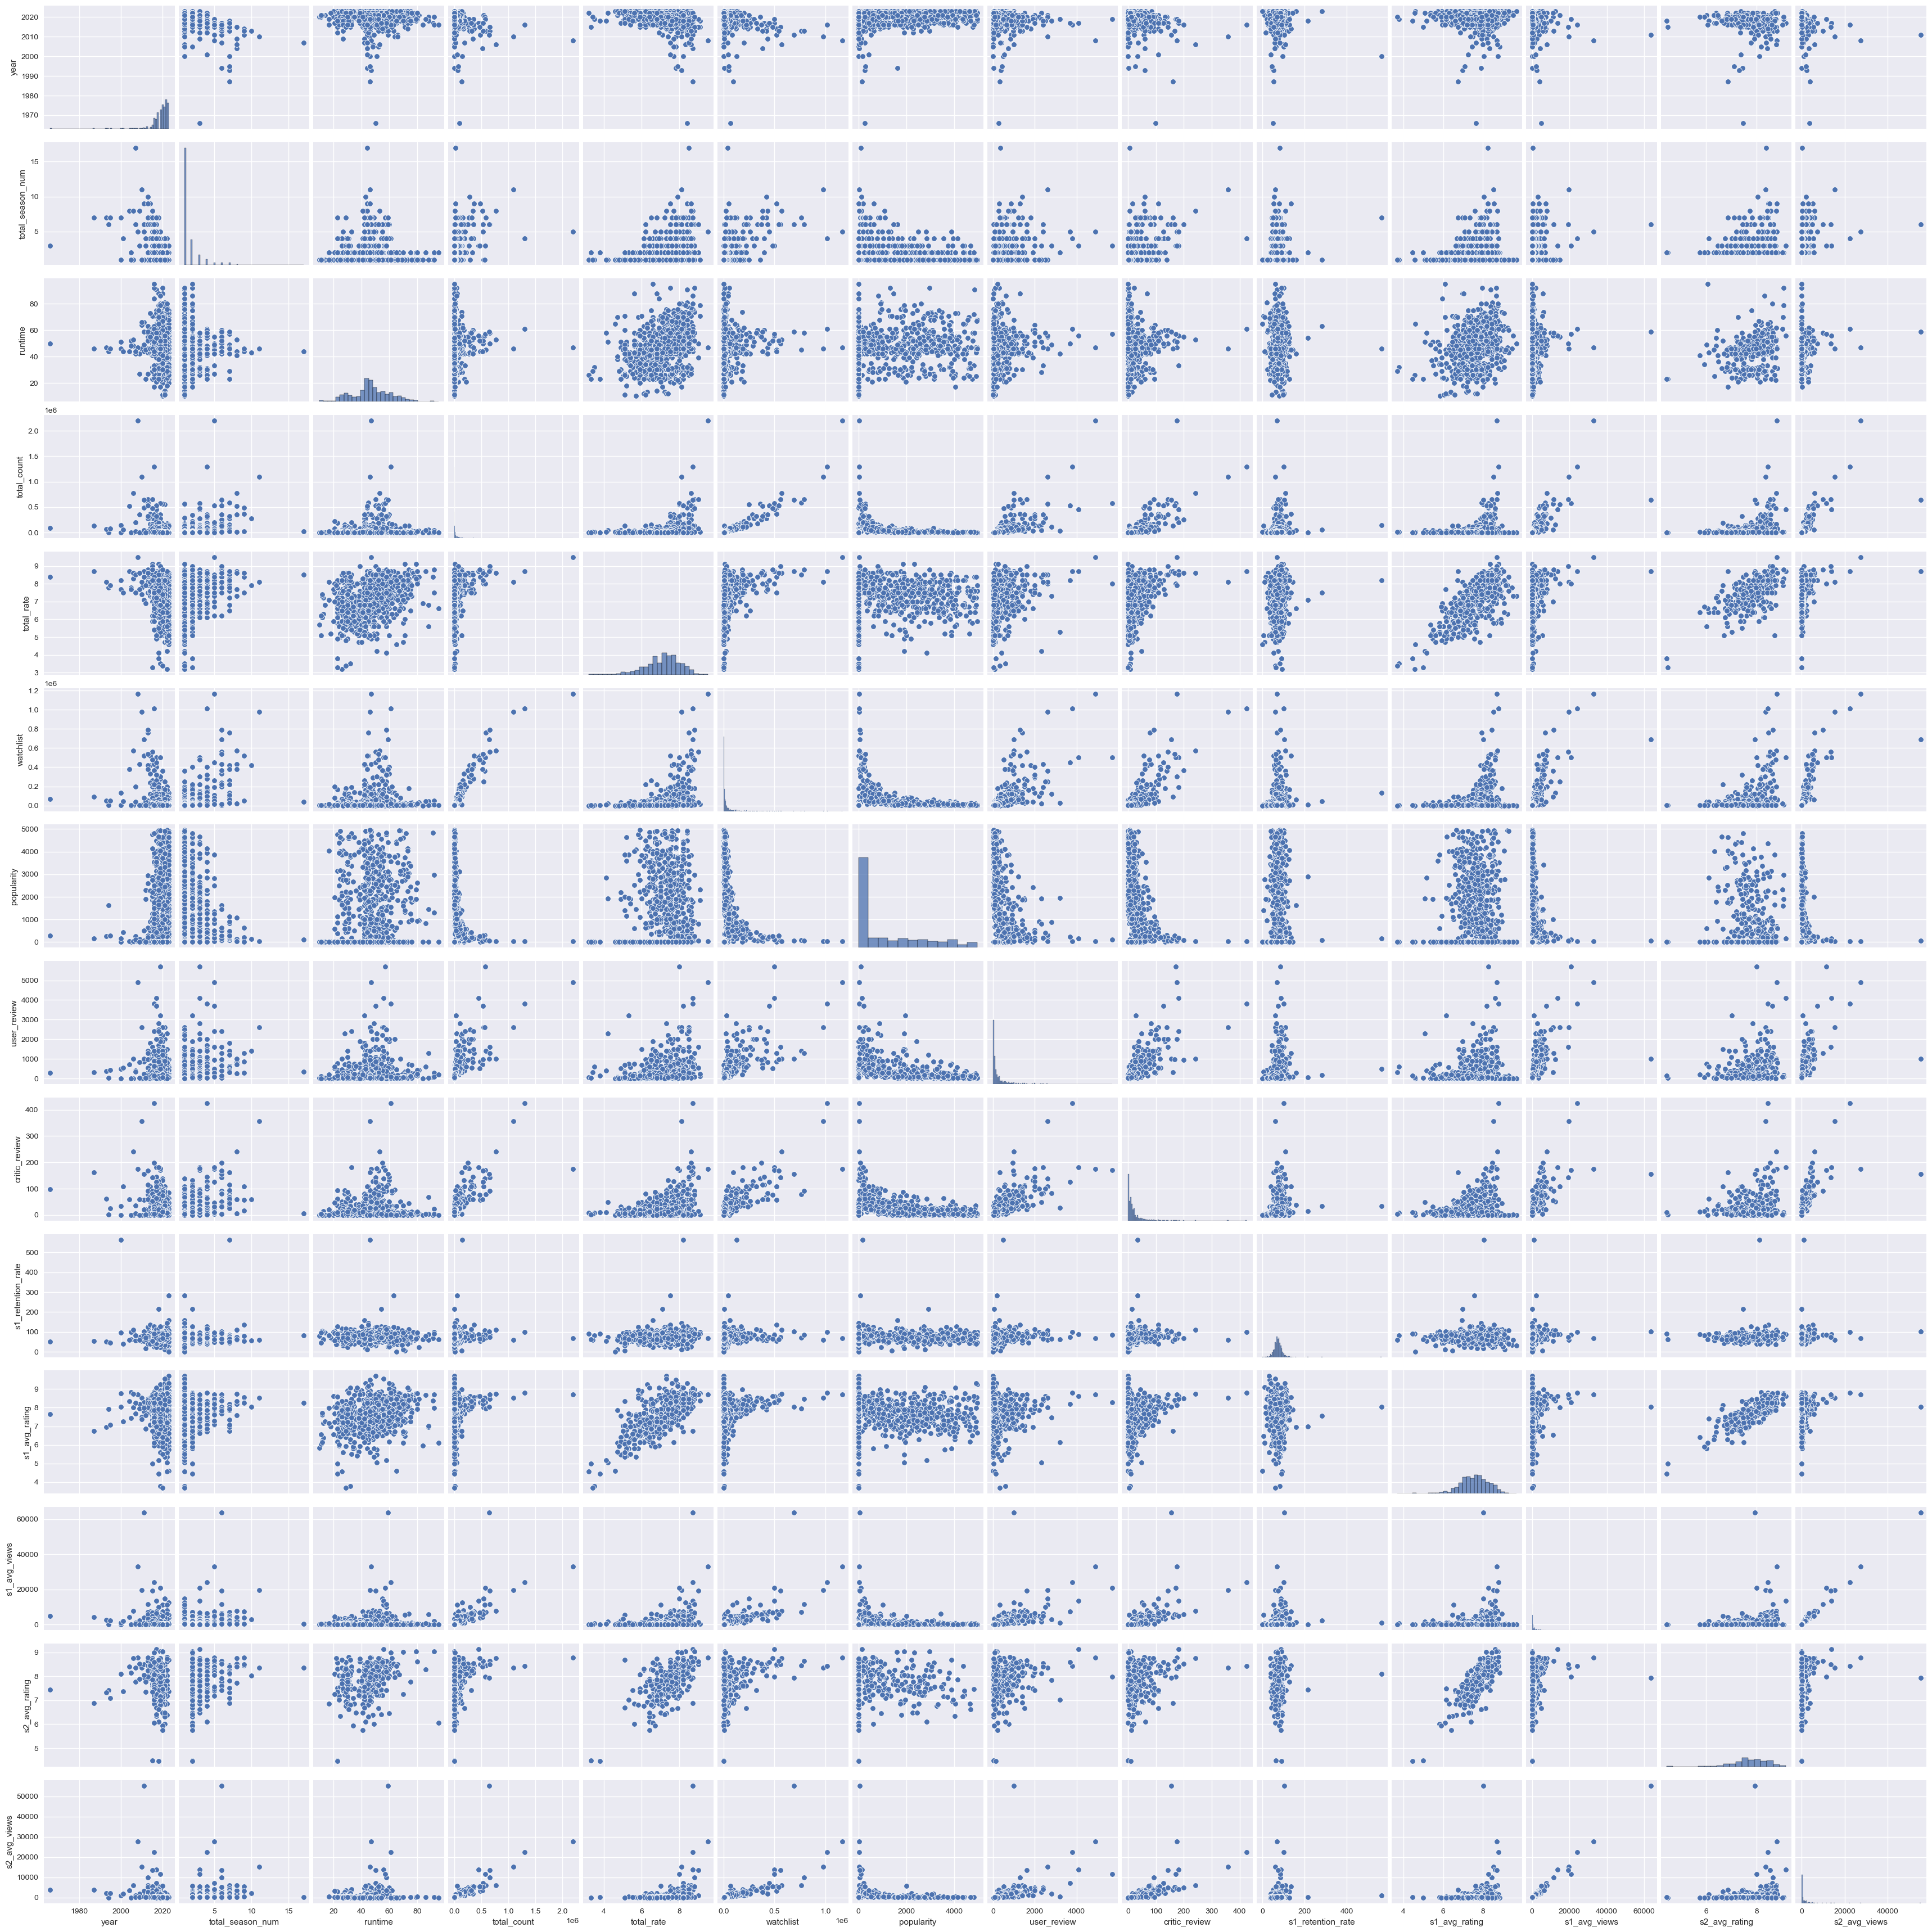

In [34]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df_int);

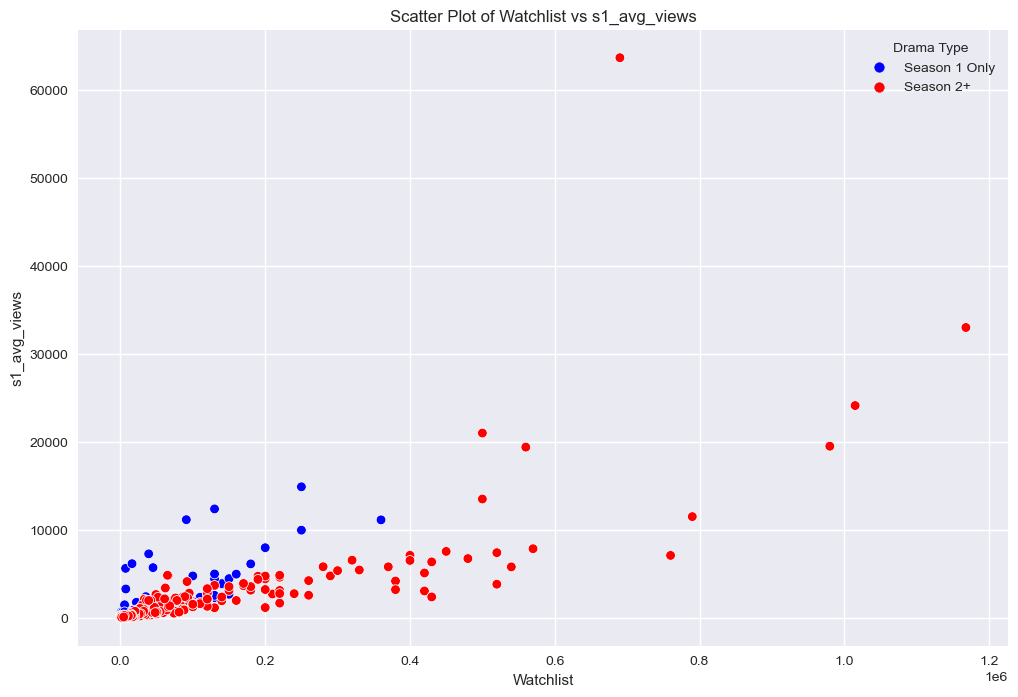

In [47]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='s1_avg_views', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs s1_avg_views')
plt.xlabel('Watchlist')
plt.ylabel('s1_avg_views')
plt.legend(title='Drama Type')
plt.show()

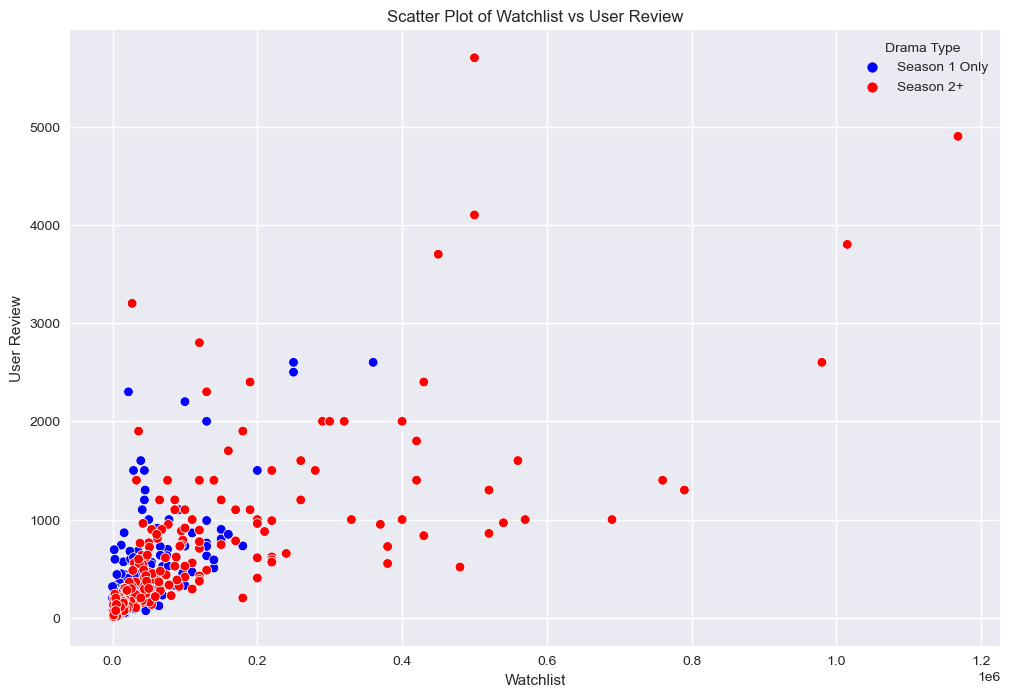

In [46]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='user_review', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs User Review')
plt.xlabel('Watchlist')
plt.ylabel('User Review')
plt.legend(title='Drama Type')
plt.show()

In [ ]:
# boxplot watchlist userrivew 같은 컬럼 이상치 체크

In [ ]:
# 흥행지표 정규 분포에 있는지 체크?

In [ ]:
# 흥행지표 개봉연도 시계열분포